In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('diabetes_dataset.csv')

# dropsome.count() = 528

cols = sorted(list(data.columns))
cols.remove('Outcome')

### Fill not assigned values with mean

In [ ]:
#for col in cols:
#    mean = normalized[col].mean()
#    normalized[col].fillna(mean, inplace=True)

In [4]:
data.count()

Pregnancies                 572
Glucose                     567
BloodPressure               537
SkinThickness               345
Insulin                     198
BMI                         561
DiabetesPedigreeFunction    572
Age                         572
Outcome                     572
dtype: int64

## Boxplot

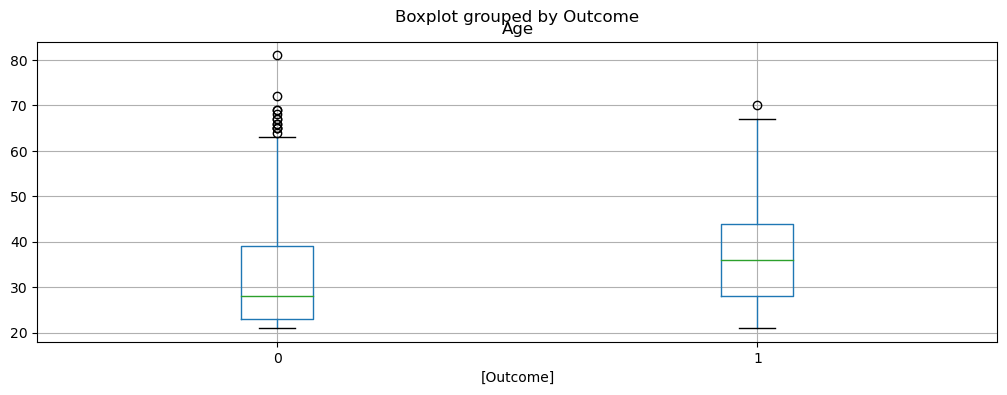

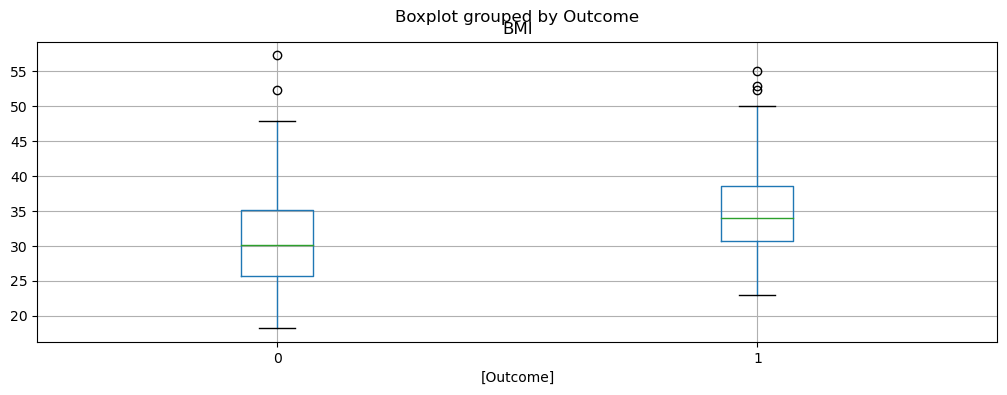

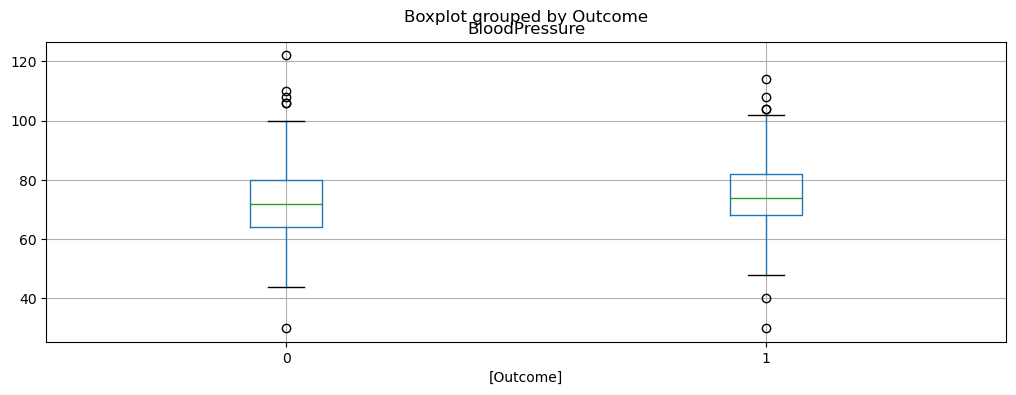

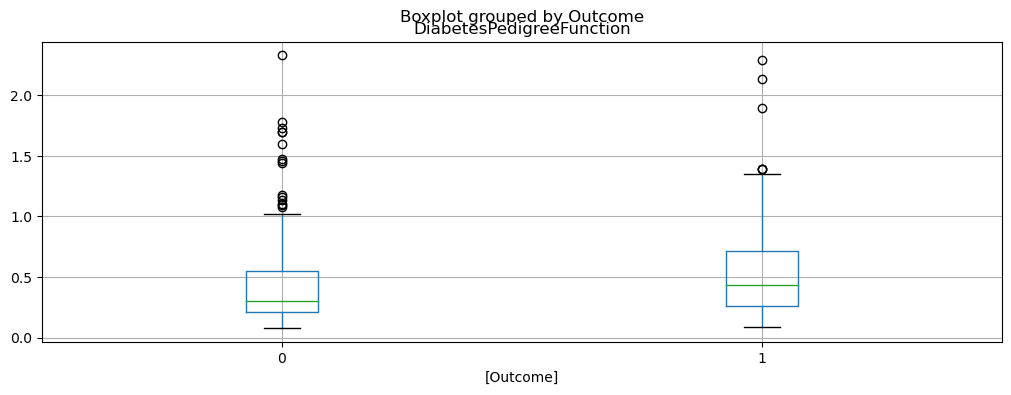

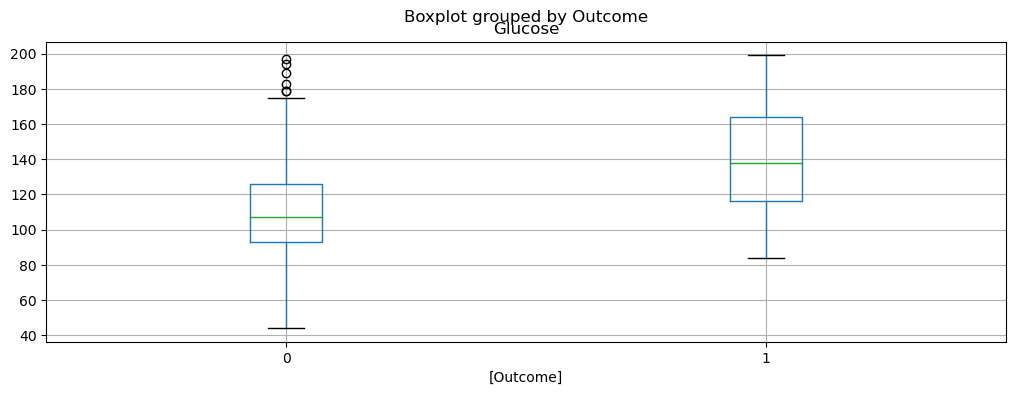

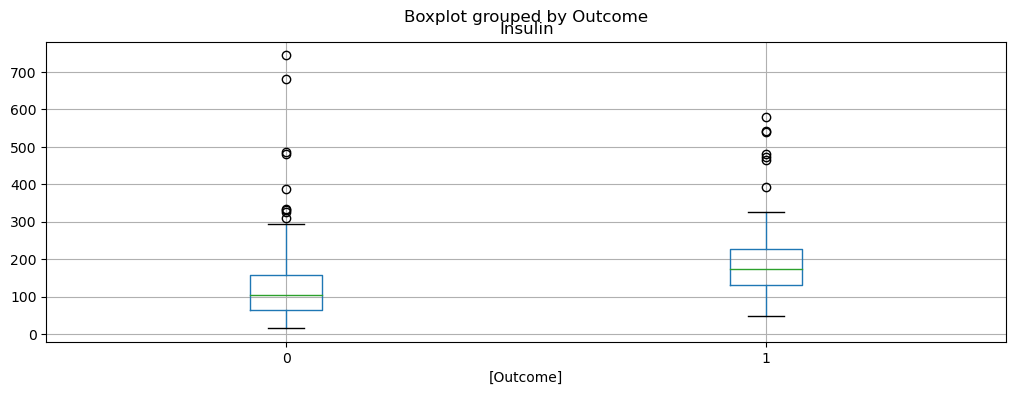

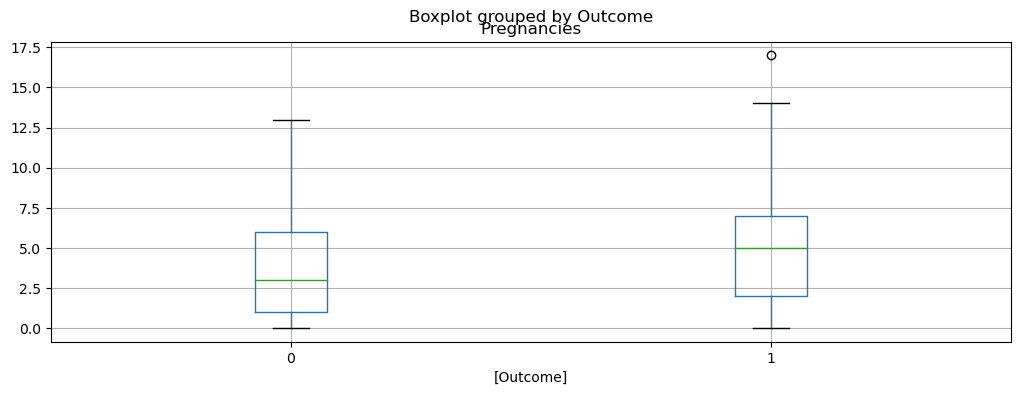

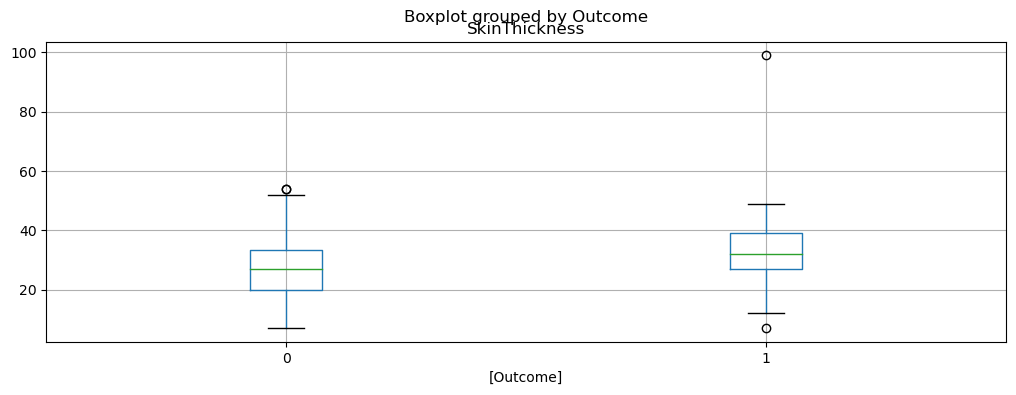

In [5]:
for col in cols:
    data[[col,"Outcome"]].boxplot(by="Outcome",figsize=(12,4))
    plt.show()

## Histogram

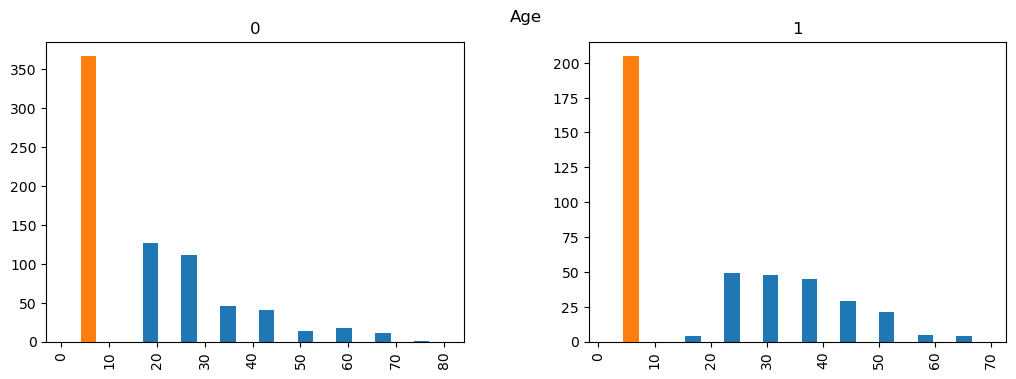

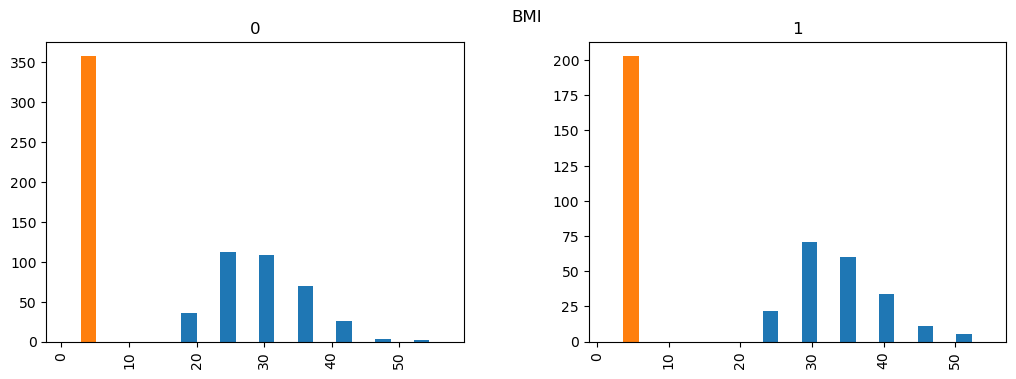

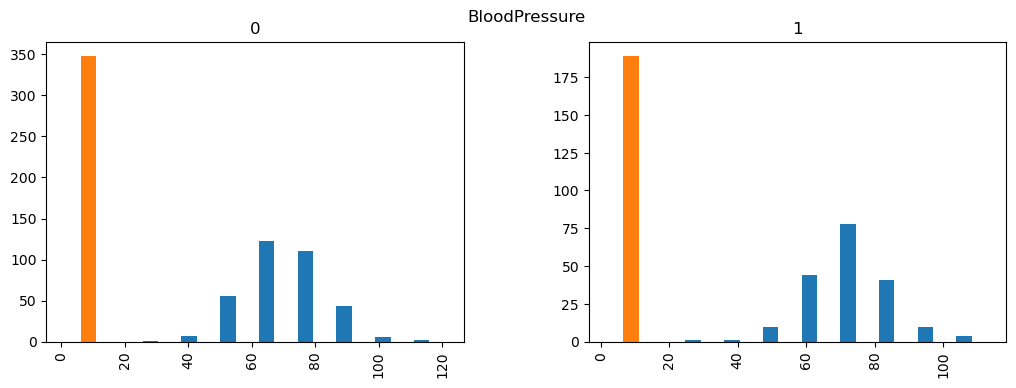

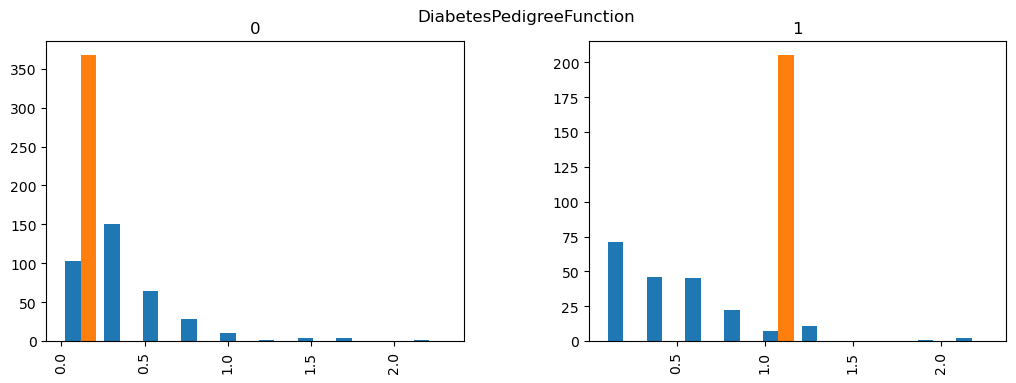

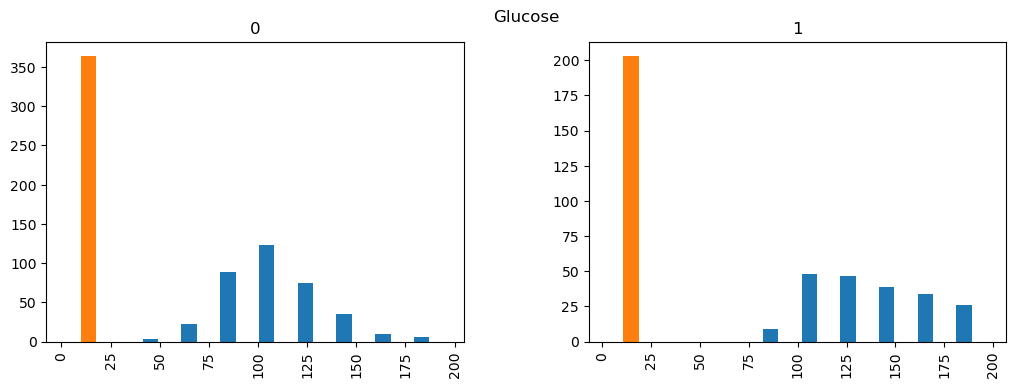

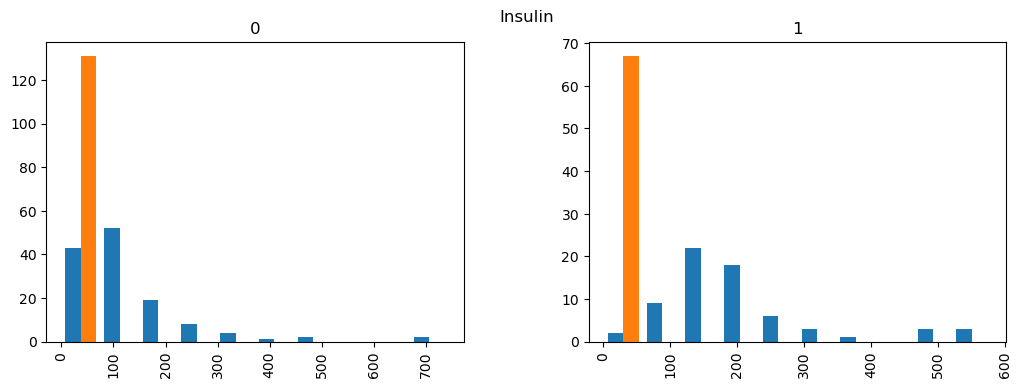

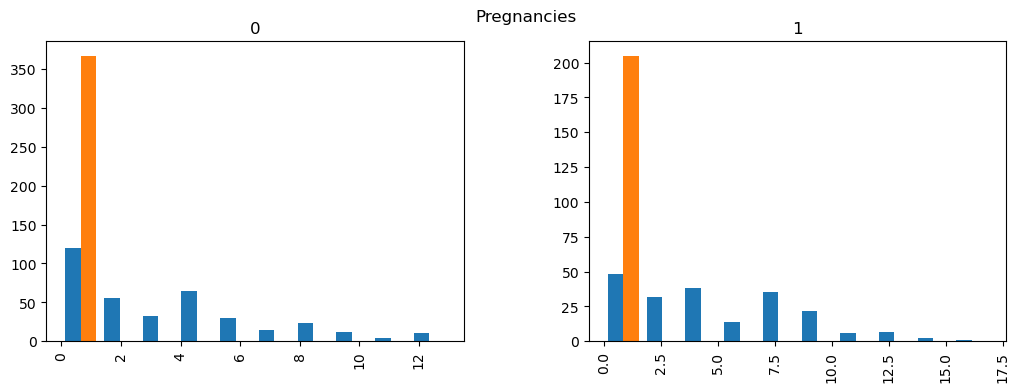

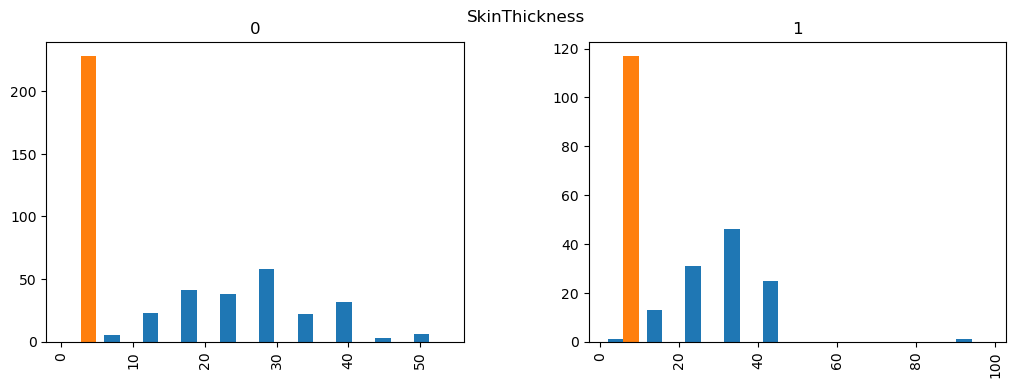

In [6]:
for col in cols:
    data[[col,"Outcome"]].hist(by="Outcome",figsize=(12,4))
    plt.suptitle(col)
    plt.show()

## Normalize the data

In [18]:
normalized = data.copy()

#fill
class0, class1 = normalized[normalized['Outcome'] == 0].copy(), normalized[normalized['Outcome'] == 1].copy()
for column in cols:
    c0m, c1m = class0[column].mean(), class1[column].mean()
    class0[column].fillna(value=c0m, inplace=True)
    class1[column].fillna(value=c1m, inplace=True)

normalized = pd.concat([class0, class1],axis=0)

#normalize
zscore_cols = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness']
for column in zscore_cols:
    #metrics
    mean = normalized[column].mean()
    std = normalized[column].std()
    #calculate z-score
    normalized[column] = (normalized[column] - mean) / std

#age bins
normalized['Age'] = normalized['Age'].apply(lambda x: 6 if x >= 60 else x // 10)

In [10]:
#fill SkinThickness na with linear regression from BMI
'''filtered = normalized[['BMI', 'SkinThickness']].copy().dropna()
model = LinearRegression()
model.fit(filtered['BMI'].to_numpy().reshape(-1, 1), filtered['SkinThickness'])
x = normalized[normalized['BMI'].notna()]['BMI']
def func(row):
    if np.isnan(row["SkinThickness"]):
        row["SkinThickness"] = row["BMI"] * model.coef_ + model.intercept_
    return row
normalized = normalized.apply(func, axis=1)'''

'filtered = normalized[[\'BMI\', \'SkinThickness\']].copy().dropna()\nmodel = LinearRegression()\nmodel.fit(filtered[\'BMI\'].to_numpy().reshape(-1, 1), filtered[\'SkinThickness\'])\nx = normalized[normalized[\'BMI\'].notna()][\'BMI\']\ndef func(row):\n    if np.isnan(row["SkinThickness"]):\n        row["SkinThickness"] = row["BMI"] * model.coef_ + model.intercept_\n    return row\nnormalized = normalized.apply(func, axis=1)'

In [21]:
normalized.count()

Pregnancies                 572
Glucose                     572
BloodPressure               572
SkinThickness               572
BMI                         572
DiabetesPedigreeFunction    572
Age                         572
Outcome                     572
dtype: int64

## Remove Outliers

In [22]:
for column in colsToNormalize:
    normalized = normalized[(np.abs(normalized[column]) < 3)]

## Normalized histograms

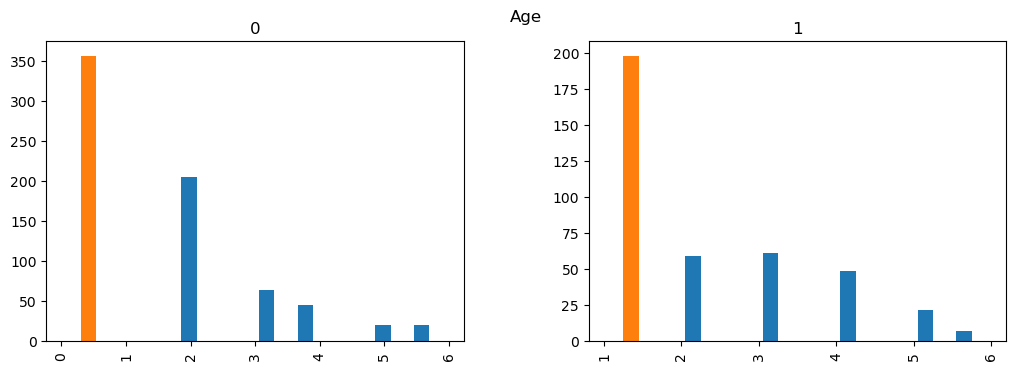

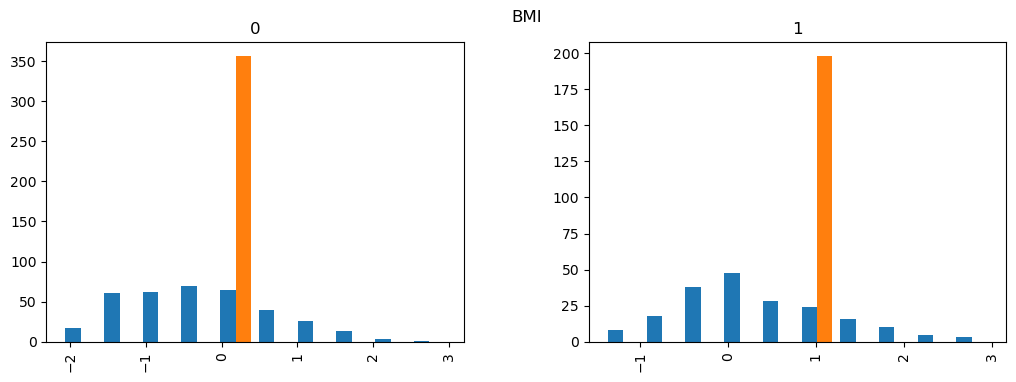

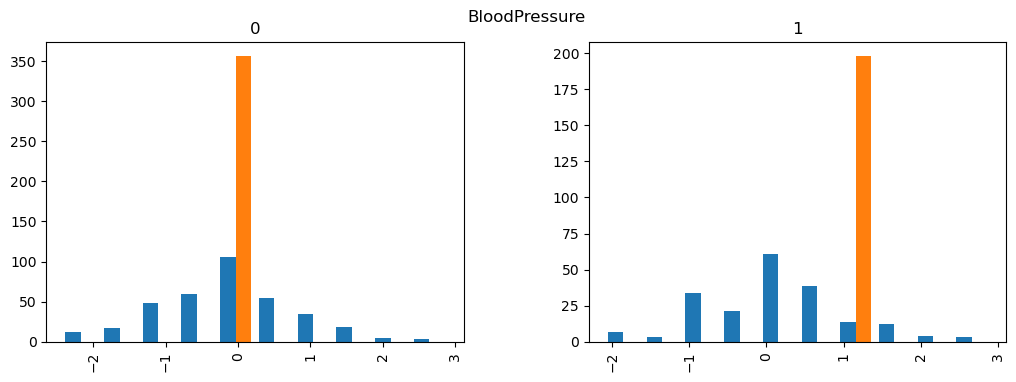

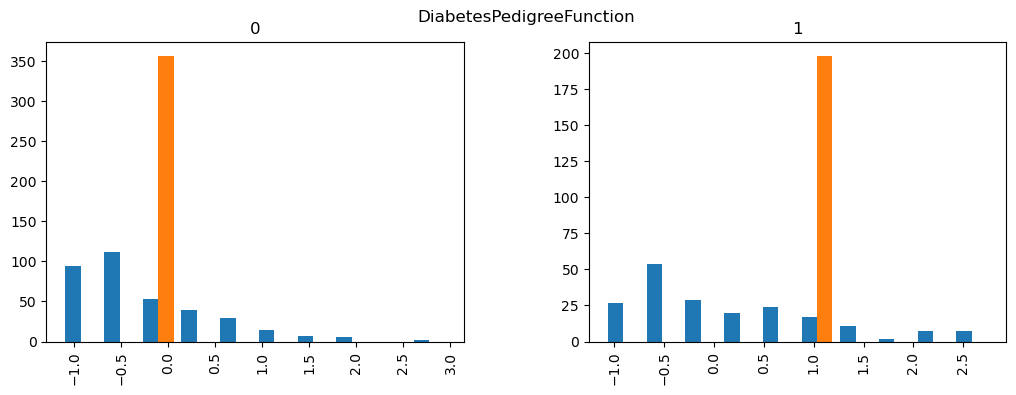

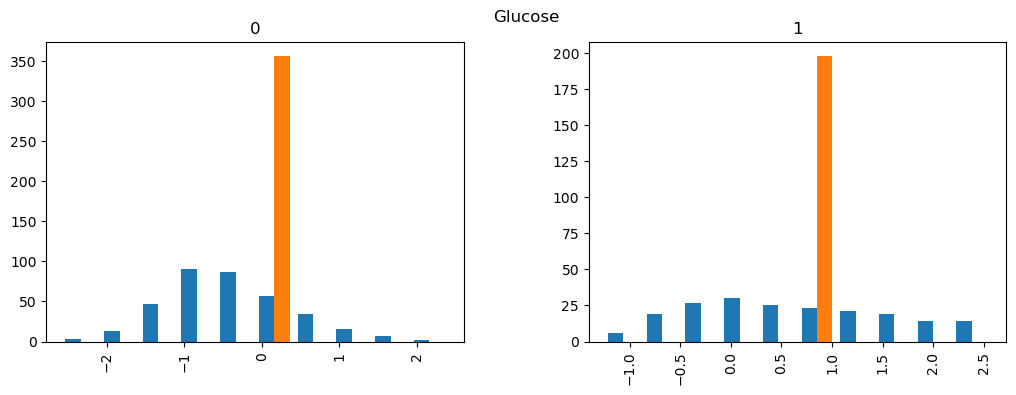

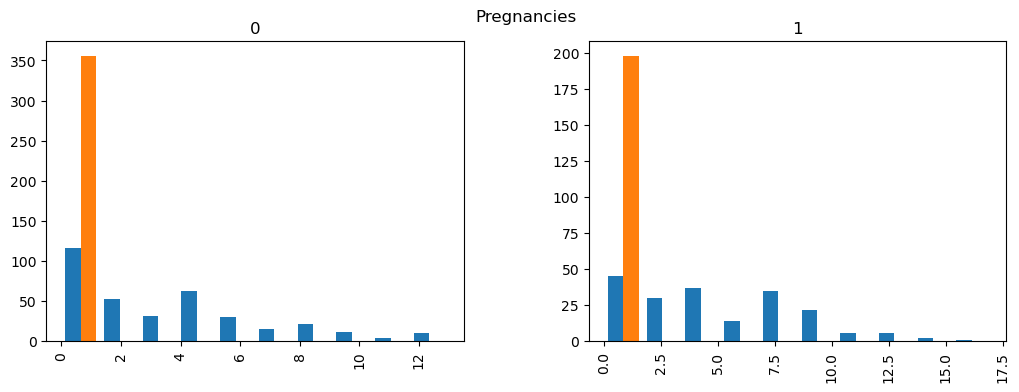

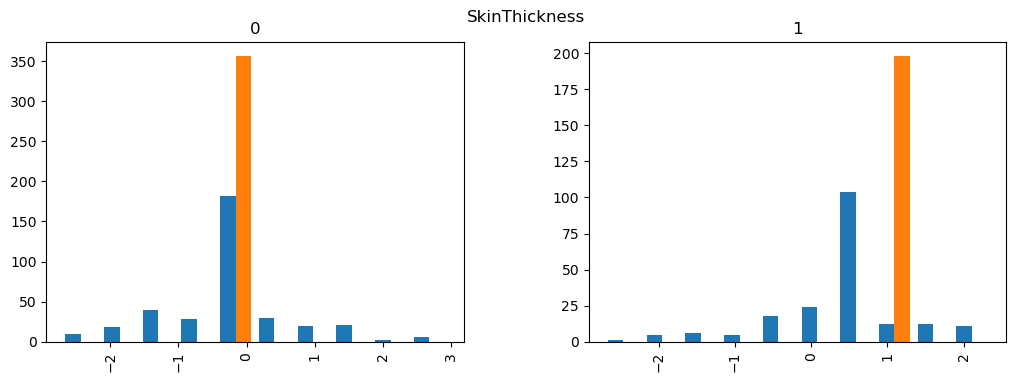

In [24]:
for col in cols:
    normalized[[col,"Outcome"]].hist(by="Outcome",figsize=(12,4))
    plt.suptitle(col)
    plt.show()

## 2D Scatterplot using normalized data

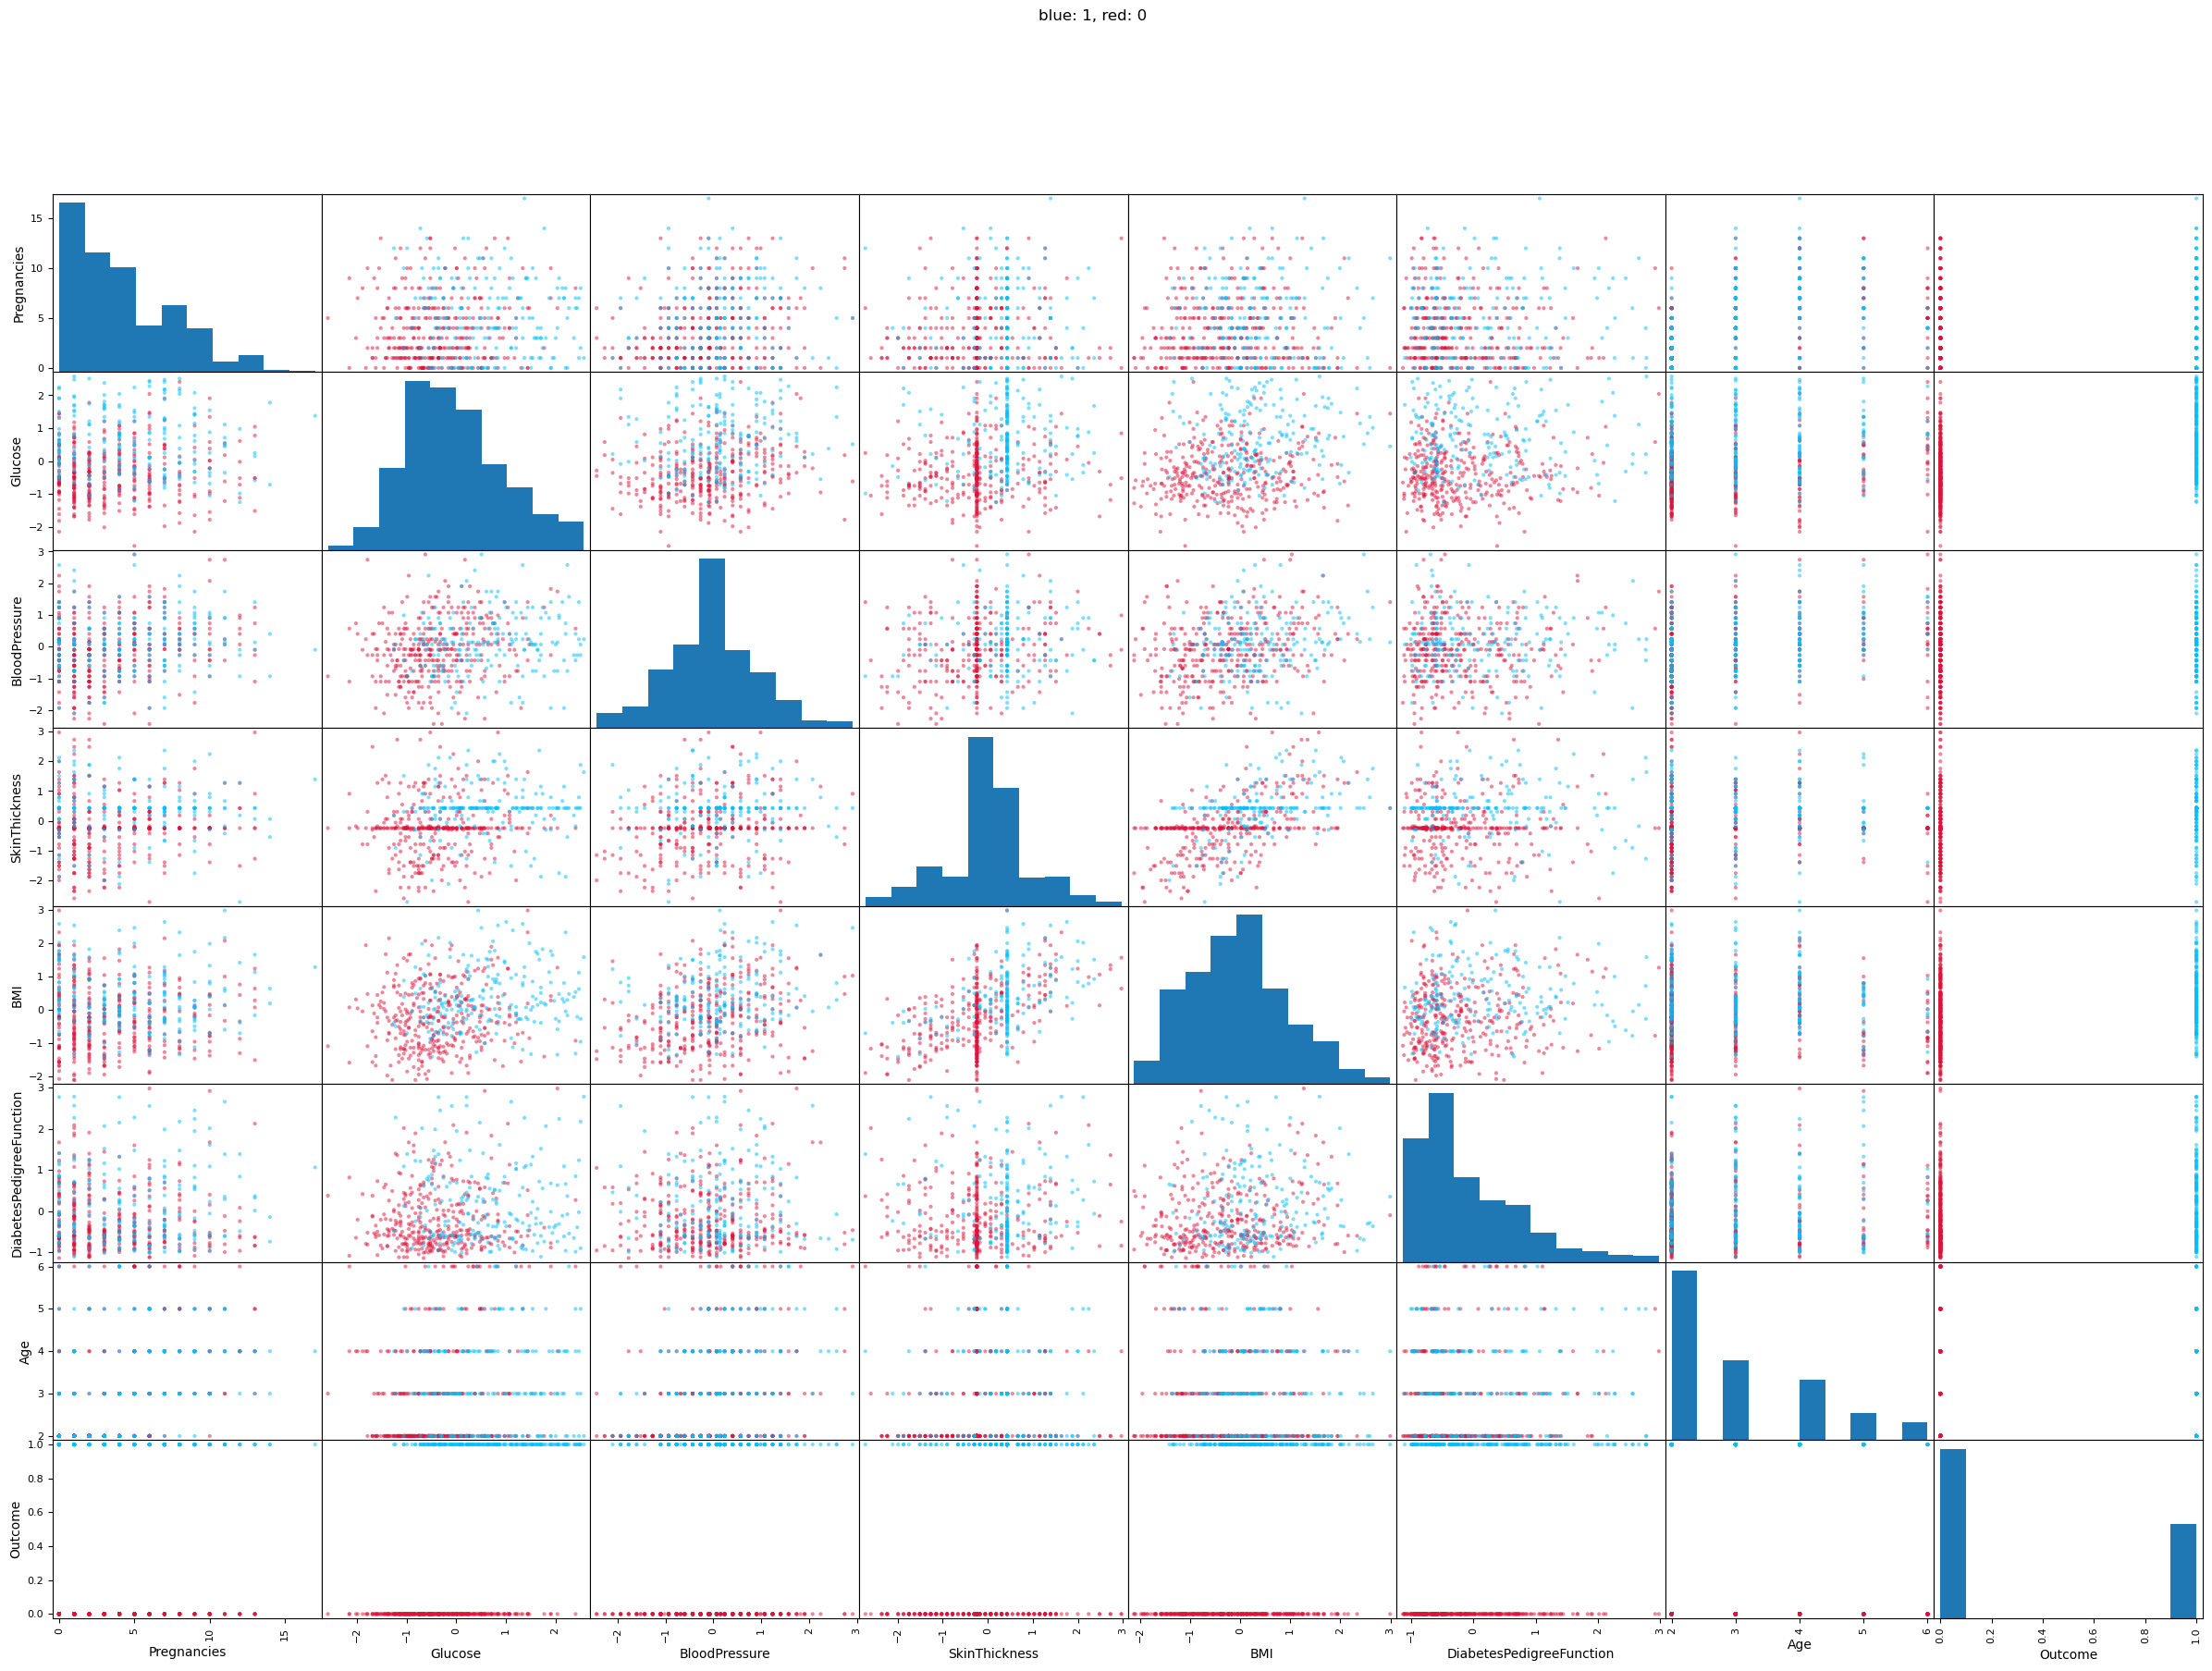

In [25]:
classes = ['deepskyblue' if x else 'crimson' for x in normalized['Outcome']]

scatter = pd.plotting.scatter_matrix(normalized, c=classes, figsize=(0,20))
plt.suptitle("blue: 1, red: 0")
plt.show()
